# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import json

In [14]:
df_1 = pd.read_csv('twitter_archive_enhanced.csv')
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [15]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

image_url = requests.get(url, allow_redirects=True)

# To save the html to file
with open('image_predictions.tsv', mode='wb')as file:

    file.write(image_url.content)

In [16]:
# to read the tsv file into a pandas dataframe

df_2 = pd.read_csv('image-predictions.tsv',sep='\t')

# to catch a quick glimpse of the first 5 rows of the dataset
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [17]:
# the following confidential data has been replaced by generic strings
consumer_key = 'CONSUMER_KEY'
consumer_secret = 'CONSUMER_SECRET'
access_token = 'ACCESS_TOKEN'
access_secret = 'ACCESS_SECRET'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

NameError: name 'tweepy' is not defined

In [18]:
# To read the JSON file, line by line
df_list = []
with open ('tweet-json copy', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        df_list.append(tweet)
# To create a pandas dataframe (df_3)
df_3 = pd.DataFrame.from_dict(df_list)
df_3.head(3)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [19]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [22]:
all_columns = pd.Series(list(df_1) + list(df_2) + list(df_3))
all_columns[all_columns.duplicated()]

17                 tweet_id
42    in_reply_to_status_id
44      in_reply_to_user_id
57                   source
dtype: object

In [23]:
list(df_3)

['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'truncated',
 'user']

In [24]:
# remove retweets.. i.e records where retweeted_status_id is not null
df_1 = df_1[pd.isnull(df_1['retweeted_status_id'])]

In [26]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [27]:
df_1.query('rating_numerator > 20')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


### Quality issues

#### `Twitter Archive Enhanced Table (df_1)` Table
1. timestamp data type is string and remove +0000

2. rating_denominator column contains inaccurate data

3. rating_numenator column contains inaccurate data

4. Erroneous datatypes (tweet_id)

5. In the name column, None is used to respresent some dog name

6. Text in source column is not readable

7. Remove Retweets


#### `Image predictions (df_2)` Table

1. Dog name in P1, P2, and P3 is separated by underscore instead of space and start with lower case letters

2. Erroneous datatypes (tweet_id)

#### `df_3` Table

1. Erroneous datatypes (created_at, id)
2. Inaccurate column header

### Tidiness issues
1. Column header in df_1 (doggo, floofer, pupper, puppo) should be in the same cloumn
2. Column header in df_2(p1,p2,p3) should be in one column
3. Column header in df_2(p1_conf, p2_conf ,p3_conf)
4. The three tables should be combined into one.
5. There are duplicated columns and columns that wont be used in the analysis


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [31]:
# Make copies of original pieces of data

df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

## Twitter Archive Enhanced Table (df_1) Table

### Issue #1:

#### Define:

- Timestamp data type is string instead of date time and remove +0000

#### Code

In [32]:

#remove +0000
df_1_clean.timestamp = df_1_clean.timestamp.str[:-6]

# convert timestamp to datetime
df_1_clean.timestamp = pd.to_datetime(df_1_clean.timestamp)

#### Test

In [33]:
df_1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,pattern,fraction
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,13/10,13/10
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,13/10,13/10
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,12/10,12/10
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,13/10,13/10
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,12/10,12/10


In [34]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
pattern                       

### Issue #2: 

Rating_denominator	 column contains inaccurate data

#### Define
update the 	rating_denominator column with the ratings in text column

#### Code

In [35]:
# Display entire text
pd.set_option('display.max_colwidth', -1)

# Filter rating_denominator not equal to 10
df_1_clean.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,pattern,fraction
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None,960/00,960/0
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None,11/15,11/15
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None,84/70,84/70
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None,24/7,24/7
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None,165/150,165/150
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None,9/11,9/11
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None,204/170,204/170
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None,4/20,4/20
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None,50/50,50/50
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good 

In [36]:
df_1_clean.rating_denominator.value_counts()

10     2153
50     3   
80     2   
11     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [37]:
df_1_clean.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,pattern,fraction
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None,960/00,960/0
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None,11/15,11/15
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None,84/70,84/70
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None,24/7,24/7
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None,165/150,165/150
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None,9/11,9/11
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None,204/170,204/170
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None,4/20,4/20
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None,50/50,50/50
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good 

In [38]:
# Correct ratings by reading through the text in text column.
# for tweet_id: 835246439529840640
df_1_clean.loc[df_1_clean.tweet_id == 835246439529840640, 'rating_numerator'] = 13
df_1_clean.loc[df_1_clean.tweet_id == 835246439529840640, 'rating_denominator'] = 10
# for tweet_id: 820690176645140481 - More than one ratings
df_1_clean.loc[df_1_clean.tweet_id == 820690176645140481, 'rating_numerator'] = 12
df_1_clean.loc[df_1_clean.tweet_id == 820690176645140481, 'rating_denominator'] = 10
# for tweet_id: 810984652412424192 - There is no ratings here
df_1_clean.loc[df_1_clean.tweet_id == 810984652412424192, 'rating_numerator'] = 10
df_1_clean.loc[df_1_clean.tweet_id == 810984652412424192, 'rating_denominator'] = 10
# for tweet_id: 775096608509886464
df_1_clean.loc[df_1_clean.tweet_id == 775096608509886464, 'rating_numerator'] = 14
df_1_clean.loc[df_1_clean.tweet_id == 775096608509886464, 'rating_denominator'] = 10
# for tweet_id: 758467244762497024 - More than one ratings
df_1_clean.loc[df_1_clean.tweet_id == 758467244762497024, 'rating_numerator'] = 11
df_1_clean.loc[df_1_clean.tweet_id == 758467244762497024, 'rating_denominator'] = 10
# for tweet_id: 740373189193256964 
df_1_clean.loc[df_1_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 14
df_1_clean.loc[df_1_clean.tweet_id == 740373189193256964, 'rating_denominator'] = 10
# for tweet_id: 731156023742988288 - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 731156023742988288, 'rating_numerator'] = 12
df_1_clean.loc[df_1_clean.tweet_id == 731156023742988288, 'rating_denominator'] = 10
# for tweet_id: 722974582966214656  
df_1_clean.loc[df_1_clean.tweet_id == 722974582966214656, 'rating_numerator'] = 13
df_1_clean.loc[df_1_clean.tweet_id == 722974582966214656, 'rating_denominator'] = 10
# for tweet_id: 716439118184652801
df_1_clean.loc[df_1_clean.tweet_id == 716439118184652801, 'rating_numerator'] = 11
df_1_clean.loc[df_1_clean.tweet_id == 716439118184652801, 'rating_denominator'] = 10
# for tweet_id: 713900603437621249 - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 713900603437621249, 'rating_numerator'] = 11
df_1_clean.loc[df_1_clean.tweet_id == 713900603437621249, 'rating_denominator'] = 10
# for tweet_id: 710658690886586372 - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 710658690886586372, 'rating_numerator'] = 10
df_1_clean.loc[df_1_clean.tweet_id == 710658690886586372, 'rating_denominator'] = 10
# for tweet_id: 709198395643068416 - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 709198395643068416, 'rating_numerator'] = 9
df_1_clean.loc[df_1_clean.tweet_id == 709198395643068416, 'rating_denominator'] = 10
# for tweet_id: 704054845121142784  - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 704054845121142784, 'rating_numerator'] = 12
df_1_clean.loc[df_1_clean.tweet_id == 704054845121142784, 'rating_denominator'] = 10
# for tweet_id: 697463031882764288 - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 697463031882764288, 'rating_numerator'] = 11
df_1_clean.loc[df_1_clean.tweet_id == 697463031882764288, 'rating_denominator'] = 10
# tweet_id: 686035780142297088 - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 686035780142297088, 'rating_numerator'] = 2
df_1_clean.loc[df_1_clean.tweet_id == 686035780142297088, 'rating_denominator'] = 10
# for tweet_id: 684225744407494656 - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 684225744407494656, 'rating_numerator'] = 11
df_1_clean.loc[df_1_clean.tweet_id == 684225744407494656, 'rating_denominator'] = 10
# for tweet_id: 684222868335505415 - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 684222868335505415, 'rating_numerator'] = 11
df_1_clean.loc[df_1_clean.tweet_id == 684222868335505415, 'rating_denominator'] = 10
# for tweet_id: 682962037429899265
df_1_clean.loc[df_1_clean.tweet_id == 682962037429899265, 'rating_numerator'] = 10
df_1_clean.loc[df_1_clean.tweet_id == 682962037429899265, 'rating_denominator'] = 10
# for tweet_id: 677716515794329600 - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 677716515794329600, 'rating_numerator'] = 12
df_1_clean.loc[df_1_clean.tweet_id == 677716515794329600, 'rating_denominator'] = 10
# tweet_id: 675853064436391936 - More than one rating
df_1_clean.loc[df_1_clean.tweet_id == 675853064436391936, 'rating_numerator'] = 11
df_1_clean.loc[df_1_clean.tweet_id == 675853064436391936, 'rating_denominator'] = 10
# tweet_id: 682808988178739200 - no ratings
df_1_clean.loc[df_1_clean.tweet_id == 682808988178739200, 'rating_numerator'] = 10
df_1_clean.loc[df_1_clean.tweet_id == 682808988178739200, 'rating_denominator'] = 10
# tweet_id: 666287406224695296
df_1_clean.loc[df_1_clean.tweet_id == 666287406224695296, 'rating_numerator'] = 9
df_1_clean.loc[df_1_clean.tweet_id == 666287406224695296, 'rating_denominator'] = 10

#drop tweet_id 832088576586297345 because the account was created on the 15-Nov-2015

df_1_clean.drop(df_1_clean.index[(df_1_clean["tweet_id"] == 832088576586297345)],axis=0,inplace=True)

#### Test

In [39]:
df_1_clean.rating_denominator.value_counts()

10    2174
Name: rating_denominator, dtype: int64

### Issue #3:

rating_numenator column contains inaccurate data

#### Define
rating_numenator column contains inaccurate data

#### code

In [40]:
df_1_clean.rating_numerator.value_counts()

12      504
10      446
11      432
13      309
9       157
8       98 
7       53 
14      44 
5       36 
6       32 
3       19 
4       15 
2       10 
1       7  
0       2  
420     2  
75      1  
26      1  
182     1  
27      1  
1776    1  
15      1  
17      1  
666     1  
Name: rating_numerator, dtype: int64

In [41]:
# rating_numerator less than 10
df_1_clean.query('rating_numerator < 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,pattern,fraction
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None,13.5/10,5/10
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111729840128/photo/1,6,10,Jerry,None,None,None,None,6/10,6/10
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None,0/10,0/10
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None,007/10,7/10
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5,10,None,None,None,None,None,5/10,5/10
765,777885040357281792,NaN,NaN,2016-09-19 15:00:20,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3,10,Wesley,None,None,None,None,3/10,3/10
814,771014301343748096,NaN,NaN,2016-08-31 15:58:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Another pic without a dog in it? What am I supposed to do? Rate the carpet? Fine I will. 7/10 looks adequately comfy https://t.co/OJZQ6I4gGd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771014301343748096/photo/1,7,10,None,None,None,None,None,7/10,7/10
835,768193404517830656,NaN,NaN,2016-08-23 21:09:14,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Gerald. He's a fairly exotic doggo. Floofy af. Inadequate knees tho. Self conscious about large forehead. 8/10 https://t.co/WmczvjCWJq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768193404517830656/photo/1,8,10,Gerald,doggo,None,None,None,8/10,8/10
845,766423258543644672,NaN,NaN,2016-08-18 23:55:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Shadoe. Her tongue flies out of her mouth at random. Can't have a serious conversation with her. 9/10 https://t.co/Tytt15VquG,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/766423258543644672/photo/1,https://twitter.com/dog_rates/status/766423258543644672/photo/1",9,10,Shadoe,None,None,Non

In [42]:
# Correct ratings by reading through the text in text column.
# for tweet_id: 883482846933004288
df_1_clean.loc[df_1_clean.tweet_id == 883482846933004288, 'rating_numerator'] = 14

In [43]:
# rating_numerator (75,420,26,27)
df_1_clean.query('rating_numerator == 75 or rating_numerator == 26 or rating_numerator == 27')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,pattern,fraction
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,9.75/10,75/10
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None,11.27/10,27/10
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None,11.26/10,26/10


In [44]:
# Correct ratings by reading through the text in text column.
# for tweet_id: 832215909146226688 9.75 appeared in the text column
df_1_clean.loc[df_1_clean.tweet_id == 832215909146226688, 'rating_numerator'] = 9.75

# for tweet_id: 786709082849828864 9.75 appeared in the text column
df_1_clean.loc[df_1_clean.tweet_id == 786709082849828864, 'rating_numerator'] = 9.75

# for tweet_id: 778027034220126208 11.27 appeared in the text column
df_1_clean.loc[df_1_clean.tweet_id == 778027034220126208, 'rating_numerator'] = 11.27

# for tweet_id: 680494726643068929 11.26 appeared in the text column
df_1_clean.loc[df_1_clean.tweet_id == 680494726643068929, 'rating_numerator'] = 11.26

#### Test

In [45]:
df_1_clean.rating_numerator.value_counts()

12.00      504
10.00      446
11.00      432
13.00      309
9.00       157
8.00       98 
7.00       53 
14.00      45 
5.00       35 
6.00       32 
3.00       19 
4.00       15 
2.00       10 
1.00       7  
0.00       2  
420.00     2  
1776.00    1  
15.00      1  
11.26      1  
11.27      1  
17.00      1  
666.00     1  
9.75       1  
182.00     1  
Name: rating_numerator, dtype: int64

### Issue #4:
- Erroneous datatypes (tweet_id)

#### Define

- Tweet_id datatype is int instead of str

#### code


In [46]:
#convert tweet_id to string data type
df_1_clean['tweet_id'] = df_1_clean['tweet_id'].astype(str)

#### Test

In [47]:
df_1_clean.tweet_id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

### Issue #5:

- In the name column, None is used to respresent some dog name

#### Define

- In the name column, replace none with NaN

#### Code

In [48]:
# in name column, replace all None with NaN values
df_1_clean.name.replace('None', np.nan, inplace=True)

#### Test

In [49]:
df_1_clean.name.value_counts()

a            55
Charlie      11
Lucy         11
Oliver       10
Cooper       10
Penny        9 
Tucker       9 
the          8 
Sadie        8 
Lola         8 
Winston      8 
Toby         7 
Daisy        7 
Jax          6 
Bo           6 
Koda         6 
Oscar        6 
Bella        6 
Stanley      6 
Bailey       6 
an           6 
Scout        5 
Rusty        5 
Dave         5 
Leo          5 
Buddy        5 
Milo         5 
Bentley      5 
Chester      5 
Louis        5 
            .. 
Nollie       1 
Jett         1 
Hermione     1 
Chesney      1 
Timison      1 
Vinnie       1 
Jeffrie      1 
Strudel      1 
Spark        1 
Lucia        1 
Charleson    1 
Chelsea      1 
Lili         1 
Obi          1 
Klein        1 
Berkeley     1 
Blu          1 
Tycho        1 
Leonard      1 
Lilly        1 
Chuq         1 
Hector       1 
Jerome       1 
Mark         1 
Sage         1 
Davey        1 
Trevith      1 
Izzy         1 
Cilantro     1 
Dallas       1 
Name: name, Length: 955,

### Issue #6:

- Text in source column is not readable

#### Define
- In the source column extract the device through which the tweet emanated from

#### Code

In [50]:
# Extract the device through which the tweet emanated from 

df_1_clean.source = df_1_clean.source.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' : 'Twitter for iPhone',
                                              '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' : 'Make a Scene',
                                              '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' : 'Twitter Web Client',
                                              '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' : 'TweetDeck'})

In [51]:
df_1_clean.source.value_counts()

Twitter for iPhone    2041
Make a Scene          91  
Twitter Web Client    31  
TweetDeck             11  
Name: source, dtype: int64

### Issue #7:

- Some columns do not contain ratings they contain retweets

#### Define
- Remove retweets

#### Code

In [53]:
# consider only orignal tweets (no retweets) 
df_1 = df_1[df_1['retweeted_status_id'].isnull()]
# remove retweet related columns
df_1 = df_1.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)

#### Test

In [55]:
df_1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'pattern', 'fraction'],
      dtype='object')

## Twitter API (df_2) Table

### Issue #1:
- Dog name in P1, P2, and P3 is separated by underscore instead of space and start with lower case letters

#### Define
- Change the column header to a better describeable words

#### code


In [56]:
#Capitalize all the names in p1, p2 and p3

df_2_clean.p1 = df_2_clean.p1.str.title()
df_2_clean.p2 = df_2_clean.p2.str.title()
df_2_clean.p3 = df_2_clean.p3.str.title()

#### Test

In [57]:
df_2_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #2: 
- Erroneous datatype (tweet_id)

#### Define
- The tweet_id column datatype is int intead of string

#### code

In [58]:
# convert tweet_id data type to string
df_2_clean['tweet_id'] = df_2_clean['tweet_id'].astype(str)

#### Test

In [59]:
df_2_clean.tweet_id.head()

0    666020888022790149
1    666029285002620928
2    666033412701032449
3    666044226329800704
4    666049248165822465
Name: tweet_id, dtype: object

## Image prediction (df_3) Table

### Issue #1:
- Erroneous datatypes (created_at, id) and remove +0000
- Inaccurate column header (id)

#### Define
- Convert the created_at column to datetime
- Change column header id to tweet_id

#### code

In [60]:
# Convert created_at to datetime
df_3_clean.created_at = pd.to_datetime(df_3_clean.created_at)

# Convert id to string
df_3_clean['id'] = df_3_clean['id'].astype(str)

In [61]:
# Change column header id to tweet_id
df_3_clean.rename(columns = {'id' : 'tweet_id'}, inplace = True)

#### Test

In [62]:
df_3_clean.created_at.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: created_at, dtype: datetime64[ns]

In [63]:
df_3_clean.tweet_id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

In [64]:
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
tweet_id                         2354 non-null object
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non

### Tidiness issues

### Issue #1:
- Column header in df_1 (doggo, floofer, pupper, puppo) should be in the same column

#### Define #1:
- Melt (doggo, floofer, pupper, puppo) into a single column

#### Code

In [65]:
# Melt (doggo, floofer, pupper, puppo) into a single column
df_1_clean = pd.melt(df_1_clean, id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 
                                           'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 
                                           'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 
                                           'rating_denominator', 'name'], value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], var_name =['dog_stage_STACKED_UP'], value_name = 'dog_stage')
df_1_clean = df_1_clean.drop('dog_stage_STACKED_UP', axis = 1)

#### Test

In [66]:
df_1_clean.dog_stage.value_counts()

None       8340
pupper     234 
doggo      87  
puppo      25  
floofer    10  
Name: dog_stage, dtype: int64

### Issue #2:


#### Define #1:
Column header in df_2(p1,p2,p3) should be in one column

In [67]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Code

In [68]:
# create 'prediction_number' and 'prediction' columns
df_2_clean = pd.melt(df_2_clean, id_vars = ['tweet_id', 'jpg_url', 'img_num', 'p1_conf', 'p1_dog','p2_conf', 'p2_dog', 'p3_conf', 'p3_dog'],
               var_name = 'prediction_number',
               value_name = 'prediction')

In [69]:
df_2_clean.head()

,tweet_id,jpg_url,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,prediction_number,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,0.465074,True,0.156665,True,0.061428,True,p1,Welsh_Springer_Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,0.506826,True,0.074192,True,0.072010,True,p1,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,0.596461,True,0.138584,True,0.116197,True,p1,German_Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,0.408143,True,0.360687,True,0.222752,True,p1,Rhodesian_Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,0.560311,True,0.243682,True,0.154629,True,p1,Miniature_Pinscher


In [70]:
df_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 11 columns):
tweet_id             6225 non-null object
jpg_url              6225 non-null object
img_num              6225 non-null int64
p1_conf              6225 non-null float64
p1_dog               6225 non-null bool
p2_conf              6225 non-null float64
p2_dog               6225 non-null bool
p3_conf              6225 non-null float64
p3_dog               6225 non-null bool
prediction_number    6225 non-null object
prediction           6225 non-null object
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 407.4+ KB


### Issue #4:
- The three tables should be combined into one.

#### Define
- Merge the df_1_clean, df_2_clean, and df_3_clean into a single table

#### Code

In [71]:
# merge df_1_clean and df_2_clean

twitter_archive = pd.merge(df_1_clean, df_2_clean, on = ['tweet_id'], how = 'left')

In [72]:
# twitter_archive and df_3_clean

twitter_archive_master = pd.merge(twitter_archive, df_3_clean, on = ['tweet_id'], how ='left')

#### Test

In [73]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24648 entries, 0 to 24647
Data columns (total 54 columns):
tweet_id                         24648 non-null object
in_reply_to_status_id_x          492 non-null float64
in_reply_to_user_id_x            492 non-null float64
timestamp                        24648 non-null datetime64[ns]
source_x                         24648 non-null object
text                             24648 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    24420 non-null object
rating_numerator                 24648 non-null float64
rating_denominator               24648 non-null int64
name                             17564 non-null object
dog_stage                        24648 non-null object
jpg_url                          23928 non-null object
img_num                          23928 non-null float64
p1_conf       

In [74]:
#CODE: print list of twitter_archive_master columns
print(list(twitter_archive_master))

#Delete columns
twitter_archive_master =twitter_archive_master.drop(['text', 'in_reply_to_user_id_x',
                                                      'retweeted_status_id', 'retweeted_status_user_id', 
                                                      'retweeted_status_timestamp', 'expanded_urls', 
                                                      'jpg_url', 'img_num', 'contributors', 'coordinates',
                                                      'created_at', 'display_text_range', 'entities', 'full_text', 'geo',
                                                      'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id_y',
                                                      'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
                                                      'in_reply_to_user_id_str', 'is_quote_status', 'possibly_sensitive',
                                                      'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id',
                                                      'quoted_status_id_str', 'retweeted_status', 'source_y', 'truncated',
                                                      'user', 'extended_entities', 'in_reply_to_status_id_x', 'p1_conf', 'p1_dog',
                                                      'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog', 'prediction_number',
                                                      'lang', 'place'], 1)

#TEST
list(twitter_archive_master)

['tweet_id', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x', 'timestamp', 'source_x', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'dog_stage', 'jpg_url', 'img_num', 'p1_conf', 'p1_dog', 'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog', 'prediction_number', 'prediction', 'contributors', 'coordinates', 'created_at', 'display_text_range', 'entities', 'extended_entities', 'favorite_count', 'favorited', 'full_text', 'geo', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id_y', 'in_reply_to_status_id_str', 'in_reply_to_user_id_y', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweet_count', 'retweeted', 'retweeted_status', 'source_y', 'truncated', 'user']


['tweet_id',
 'timestamp',
 'source_x',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'prediction',
 'favorite_count',
 'favorited',
 'retweet_count',
 'retweeted']

In [75]:
twitter_archive_master.head()

,tweet_id,timestamp,source_x,rating_numerator,rating_denominator,name,dog_stage,prediction,favorite_count,favorited,retweet_count,retweeted
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,13.0,10,Phineas,None,Orange,39467,False,8853,False
1,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,13.0,10,Phineas,None,Bagel,39467,False,8853,False
2,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,13.0,10,Phineas,None,Banana,39467,False,8853,False
3,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,13.0,10,Tilly,None,Chihuahua,33819,False,6514,False
4,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,13.0,10,Tilly,None,Pekinese,33819,False,6514,False


In [76]:
df_dog_type_count = twitter_archive_master.groupby('name').count()
df_dog_type_count

,tweet_id,timestamp,source_x,rating_numerator,rating_denominator,dog_stage,prediction,favorite_count,favorited,retweet_count,retweeted
name,,,,,,,,,,,
Abby,24,24,24,24,24,24,24,24,24,24,24
Ace,12,12,12,12,12,12,12,12,12,12,12
Acro,12,12,12,12,12,12,12,12,12,12,12
Adele,12,12,12,12,12,12,12,12,12,12,12
Aiden,12,12,12,12,12,12,12,12,12,12,12
Aja,12,12,12,12,12,12,12,12,12,12,12
Akumi,12,12,12,12,12,12,12,12,12,12,12
Al,12,12,12,12,12,12,12,12,12,12,12
Albert,24,24,24,24,24,24,24,24,24,24,24


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [77]:
#Store the clean DataFrame in a CSV file
twitter_archive_master.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Most common device used to tweet

2. Dog with highest and lowest number of ratings

3. Most common dog 

### Visualization
- Is there Correlation between ratings and favourite counts

#### Insight 1
- The most common phone used to tweet is Iphone

In [441]:
#most common device 
twitter_archive_master.source_x.value_counts()

Twitter for iPhone    23804
Make a Scene          364  
Twitter Web Client    348  
TweetDeck             132  
Name: source_x, dtype: int64

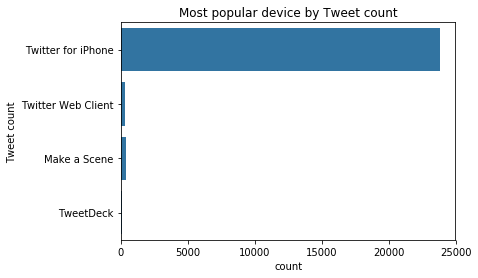

In [463]:
basecolor = sns.color_palette()[0]
sns.countplot(data = twitter_archive_master, y = 'source_x', color = basecolor)
plt.ylabel('Device used to Tweet')
plt.ylabel('Tweet count')
plt.title('Most popular device by Tweet count');

#### Insight 2
-  `Sunglass` has the highest ratings of 893/10
-  `Space_Shuttle	` has the lowest ratings of 0/10

In [451]:
twitter_archive_master_p1_average_ratings = twitter_archive_master.groupby('prediction').mean()
twitter_archive_master_p1_average_ratings.sort_values('rating_numerator', axis = 0, ascending = False,
                                                     inplace = True, na_position ='last')
twitter_archive_master_p1_average_ratings.head()

,rating_numerator,rating_denominator,favorite_count,favorited,retweet_count,retweeted
prediction,,,,,,
Sunglass,893.000000,10.0,5223.500000,0.0,2508.500000,0.0
Drumstick,420.000000,10.0,7989.000000,0.0,4324.000000,0.0
Accordion,420.000000,10.0,7989.000000,0.0,4324.000000,0.0
Microphone,420.000000,10.0,7989.000000,0.0,4324.000000,0.0
Bow_Tie,261.571429,10.0,6690.285714,0.0,2399.142857,0.0


In [452]:
twitter_archive_master_p1_average_ratings = twitter_archive_master.groupby('prediction').mean()
twitter_archive_master_p1_average_ratings.sort_values('rating_numerator', axis = 0, ascending = True,
                                                     inplace = True, na_position ='last')
twitter_archive_master_p1_average_ratings.head()

,rating_numerator,rating_denominator,favorite_count,favorited,retweet_count,retweeted
prediction,,,,,,
Space_Shuttle,0.0,10.0,3168.0,0.0,336.0,0.0
Partridge,1.0,10.0,14765.0,0.0,6871.0,0.0
Sulphur_Butterfly,1.0,10.0,872.0,0.0,431.0,0.0
Spotlight,1.0,10.0,6138.0,0.0,2454.0,0.0
Lacewing,1.0,10.0,872.0,0.0,431.0,0.0


#### Insight 3
- The most common dogs are  Golden_Retriever and Labrador_Retriever  

In [464]:
twitter_archive_master.prediction.value_counts().head()

Golden_Retriever      1068
Labrador_Retriever    1068
Chihuahua             716 
Pembroke              556 
Cardigan              452 
Name: prediction, dtype: int64

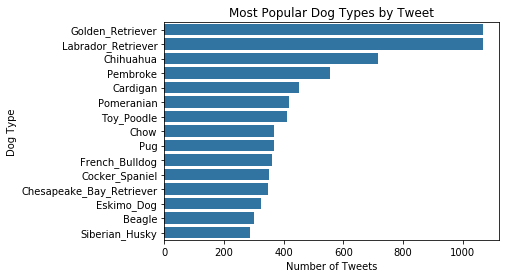

In [465]:
base_color = sns.color_palette()[0]
dog_order = twitter_archive_master['prediction'].value_counts().head(15)
sns.countplot(data=twitter_archive_master, y='prediction', color=base_color, order=dog_order.index)
plt.title('Most Popular Dog Types by Tweet')
plt.xlabel('Number of Tweets')
plt.ylabel('Dog Type');

### Visualization
- There is a right-upward trend between Retweets and Favorites tweet, meaning High numbers of Retweets and Favorite goes together


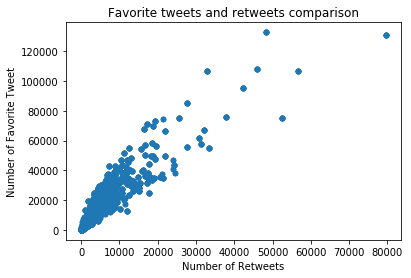

In [470]:
twitter_archive_master.plot.scatter(x = 'retweet_count', y = 'favorite_count')
plt.title('Favorite tweets and retweets comparison')
plt.xlabel('Number of Retweets')
plt.ylabel('Number of Favorite Tweet');